In [2]:
!pip install pykeen -q

import numpy as np
import torch
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(42)
torch.manual_seed(42)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 931.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.4 MB/s eta 0:00:00


INFO:pykeen.utils:Using opt_einsum


In [3]:
triples_str = [
    ('Knight',        'hasRarity', 'Common'),
    ('Archers',       'hasRarity', 'Common'),
    ('Zap',           'hasRarity', 'Common'),
    ('Minions',       'hasRarity', 'Common'),
    ('Arrows',        'hasRarity', 'Common'),

    ('Fireball',      'hasRarity', 'Rare'),
    ('Giant',         'hasRarity', 'Rare'),
    ('Musketeer',     'hasRarity', 'Rare'),
    ('GoblinHut',     'hasRarity', 'Rare'),
    ('InfernoTower',  'hasRarity', 'Rare'),
    ('Valkyrie',      'hasRarity', 'Rare'),
    ('IceGolem',      'hasRarity', 'Rare'),

    ('BabyDragon',    'hasRarity', 'Epic'),
    ('HogRider',      'hasRarity', 'Epic'),
    ('Tornado',       'hasRarity', 'Epic'),

    ('Knight',        'hasType', 'Troop'),
    ('Archers',       'hasType', 'Troop'),
    ('Giant',         'hasType', 'Troop'),
    ('Musketeer',     'hasType', 'Troop'),
    ('BabyDragon',    'hasType', 'Troop'),
    ('HogRider',      'hasType', 'Troop'),
    ('IceGolem',      'hasType', 'Troop'),
    ('Minions',       'hasType', 'Troop'),
    ('Valkyrie',      'hasType', 'Troop'),

    ('GoblinHut',     'hasType', 'Building'),
    ('InfernoTower',  'hasType', 'Building'),

    ('Fireball',      'hasType', 'Spell'),
    ('Zap',           'hasType', 'Spell'),
    ('Arrows',        'hasType', 'Spell'),
    ('Tornado',       'hasType', 'Spell'),

    ('Knight',        'costsElixir', 'Elixir3'),
    ('Archers',       'costsElixir', 'Elixir3'),
    ('Minions',       'costsElixir', 'Elixir3'),

    ('Fireball',      'costsElixir', 'Elixir4'),
    ('Musketeer',     'costsElixir', 'Elixir4'),
    ('BabyDragon',    'costsElixir', 'Elixir4'),
    ('HogRider',      'costsElixir', 'Elixir4'),
    ('Valkyrie',      'costsElixir', 'Elixir4'),

    ('Giant',         'costsElixir', 'Elixir5'),
    ('GoblinHut',     'costsElixir', 'Elixir5'),
    ('InfernoTower',  'costsElixir', 'Elixir5'),

    ('Zap',           'costsElixir', 'Elixir2'),
    ('Arrows',        'costsElixir', 'Elixir3'),
    ('IceGolem',      'costsElixir', 'Elixir2'),
    ('Tornado',       'costsElixir', 'Elixir3'),
    ('InfernoTower',  'counters', 'Giant'),
    ('InfernoTower',  'counters', 'BabyDragon'),
    ('InfernoTower',  'counters', 'HogRider'),

    ('Valkyrie',      'counters', 'Minions'),
    ('Arrows',        'counters', 'Minions'),
    ('Arrows',        'counters', 'Archers'),

    ('Zap',           'counters', 'InfernoTower'),
    ('Zap',           'counters', 'Minions'),

    ('Tornado',       'counters', 'HogRider'),
    ('Tornado',       'counters', 'Knight'),


    ('HogRider',      'synergizesWith', 'IceGolem'),
    ('IceGolem',      'synergizesWith', 'HogRider'),

    ('HogRider',      'synergizesWith', 'Zap'),
    ('Zap',           'synergizesWith', 'HogRider'),

    ('Giant',         'synergizesWith', 'Musketeer'),
    ('Musketeer',     'synergizesWith', 'Giant'),

    ('Giant',         'synergizesWith', 'Minions'),
    ('Minions',       'synergizesWith', 'Giant'),

    ('BabyDragon',    'synergizesWith', 'Tornado'),
    ('Tornado',       'synergizesWith', 'BabyDragon'),
]

print(f'Всего триплетов: {len(triples_str)}')


Всего триплетов: 65


In [4]:
triples_np = np.array(triples_str, dtype=str)

tf = TriplesFactory.from_labeled_triples(triples_np)

training, testing, validation = tf.split([0.8, 0.1, 0.1], random_state=42)

print("train triples:", training.num_triples)
print("test triples:", testing.num_triples)
print("valid triples:", validation.num_triples)


print("Количество сущностей:", len(tf.entity_to_id))
print("Количество типов отношений:", len(tf.relation_to_id))
print("\nПример отображения сущность -> id:")
for i, (ent, idx) in enumerate(tf.entity_to_id.items()):
    print(f"  {ent:15s} -> {idx}")
    if i >= 5:
        break

print("\nТипы отношений:")
for rel, idx in tf.relation_to_id.items():
    print(f"  {rel:15s} -> {idx}")


INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [32, 6, 7]


train triples: 52
test triples: 6
valid triples: 7
Количество сущностей: 25
Количество типов отношений: 5

Пример отображения сущность -> id:
  Archers         -> 0
  Arrows          -> 1
  BabyDragon      -> 2
  Building        -> 3
  Common          -> 4
  Elixir2         -> 5

Типы отношений:
  costsElixir     -> 0
  counters        -> 1
  hasRarity       -> 2
  hasType         -> 3
  synergizesWith  -> 4


In [5]:
from pykeen.pipeline import pipeline

result = pipeline(
    training=training,
    testing=testing,
    validation=validation,

    model='TransE',
    model_kwargs=dict(
        embedding_dim=32,
        scoring_fct_norm=1,
    ),

    training_loop='sLCWA',

    training_kwargs=dict(
        num_epochs=200,
        batch_size=64,
    ),

    optimizer='adam',
    optimizer_kwargs=dict(lr=0.01),

    random_seed=42,
    device='cpu',
)

print("Обучение завершено.")


INFO:pykeen.pipeline.api:Using device: cpu
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training epochs on cpu:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/1.00 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/6.00 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.11s seconds


Обучение завершено.


In [6]:
print("Результаты ранжирования (Rank-based metrics):")
print(result.metric_results)

metrics_dict = result.metric_results.to_dict()
metrics_dict


Результаты ранжирования (Rank-based metrics):


{'head': {'optimistic': {'z_inverse_harmonic_mean_rank': 0.8219396807848387,
   'arithmetic_mean_rank': 9.5,
   'adjusted_geometric_mean_rank_index': 0.23046697106027114,
   'adjusted_arithmetic_mean_rank_index': 0.10526315789473673,
   'adjusted_inverse_harmonic_mean_rank': 0.08975036401337391,
   'adjusted_arithmetic_mean_rank': 0.9047619047619047,
   'standard_deviation': 6.370504951205464,
   'geometric_mean_rank': 6.887194149824129,
   'count': 6.0,
   'inverse_geometric_mean_rank': 0.1451970103130512,
   'inverse_median_rank': 0.125,
   'inverse_arithmetic_mean_rank': 0.10526315789473684,
   'median_absolute_deviation': 2.965204437011204,
   'inverse_harmonic_mean_rank': 0.2555315055315055,
   'median_rank': 8.0,
   'z_arithmetic_mean_rank': 0.420255733380384,
   'variance': 40.583333333333336,
   'harmonic_mean_rank': 3.913411764705883,
   'z_geometric_mean_rank': 0.6659515040438704,
   'hits_at_1': 0.16666666666666666,
   'hits_at_3': 0.16666666666666666,
   'hits_at_5': 0.1666

In [10]:
model = result.model

entity_embeddings = model.entity_representations[0]().detach().cpu().numpy()
relation_embeddings = model.relation_representations[0]().detach().cpu().numpy()

id_to_entity = {idx: ent for ent, idx in tf.entity_to_id.items()}
id_to_relation = {idx: rel for rel, idx in tf.relation_to_id.items()}

print("Размерность эмбеддингов сущностей:", entity_embeddings.shape)
print("Размерность эмбеддингов отношений:", relation_embeddings.shape)

for card in ['HogRider', 'IceGolem', 'InfernoTower', 'Zap']:
    idx = tf.entity_to_id[card]
    vec = entity_embeddings[idx]
    print(f"\nКарта: {card}, id={idx}")
    print("Первые 8 компонент эмбеддинга:", np.round(vec[:8], 4))


Размерность эмбеддингов сущностей: (25, 32)
Размерность эмбеддингов отношений: (5, 32)

Карта: HogRider, id=13
Первые 8 компонент эмбеддинга: [-0.2264 -0.2045 -0.1184  0.1511  0.1392 -0.1596  0.3033 -0.366 ]

Карта: IceGolem, id=14
Первые 8 компонент эмбеддинга: [ 0.1368 -0.081  -0.1608 -0.2505 -0.0087 -0.1717  0.3356 -0.01  ]

Карта: InfernoTower, id=15
Первые 8 компонент эмбеддинга: [ 0.1246  0.0283 -0.0496 -0.034  -0.0577  0.021   0.1484 -0.1819]

Карта: Zap, id=24
Первые 8 компонент эмбеддинга: [ 0.3827 -0.0323 -0.0301 -0.2325 -0.0339 -0.1274 -0.0858 -0.0124]


In [8]:
from numpy.linalg import norm

def show_nearest_neighbors(entity_name, k=5):
    """Показать k ближайших сущностей к заданной по косинусной близости."""
    if entity_name not in tf.entity_to_id:
        print(f"Сущность {entity_name} не найдена.")
        return

    e_idx = tf.entity_to_id[entity_name]
    e_vec = entity_embeddings[e_idx]

    sims = []
    for idx in range(entity_embeddings.shape[0]):
        if idx == e_idx:
            continue
        v = entity_embeddings[idx]
        cos_sim = np.dot(e_vec, v) / (norm(e_vec) * norm(v) + 1e-9)
        sims.append((idx, cos_sim))

    sims.sort(key=lambda x: x[1], reverse=True)

    print(f"Ближайшие соседи для сущности '{entity_name}':")
    for idx, sim in sims[:k]:
        print(f"  {id_to_entity[idx]:15s}  cos_sim={sim:.4f}")

show_nearest_neighbors('HogRider', k=5)
print()
show_nearest_neighbors('InfernoTower', k=5)


Ближайшие соседи для сущности 'HogRider':
  IceGolem         cos_sim=0.5005
  InfernoTower     cos_sim=0.4385
  Troop            cos_sim=0.3276
  Elixir4          cos_sim=0.3178
  BabyDragon       cos_sim=0.2368

Ближайшие соседи для сущности 'InfernoTower':
  HogRider         cos_sim=0.4385
  Elixir5          cos_sim=0.4294
  Giant            cos_sim=0.3255
  GoblinHut        cos_sim=0.2706
  Zap              cos_sim=0.2558


In [11]:
from numpy.linalg import norm

def rank_tails(head, relation, candidates=None, k=10):
    """Отранжировать кандидатов t в триплете (head, relation, t)."""
    if head not in tf.entity_to_id:
        print(f"Нет такой сущности: {head}")
        return
    if relation not in tf.relation_to_id:
        print(f"Нет такого отношения: {relation}")
        return

    h_id = tf.entity_to_id[head]
    r_id = tf.relation_to_id[relation]

    if candidates is None:
        tails = list(tf.entity_to_id.keys())
    else:
        tails = candidates

    for t in tails:
        if t not in tf.entity_to_id:
            print(f"Кандидат '{t}' не найден в entity_to_id")
            return

    t_ids = torch.tensor([tf.entity_to_id[t] for t in tails], dtype=torch.long)
    h_ids = torch.full_like(t_ids, h_id)
    r_ids = torch.full_like(t_ids, r_id)

    batch_hrt = torch.stack([h_ids, r_ids, t_ids], dim=1)

    with torch.no_grad():
        scores_torch = model.score_hrt(batch_hrt)
        scores = scores_torch.view(-1).cpu().numpy()

    order = np.argsort(scores)[::-1]

    print(f"Ранжирование кандидатов для ({head}, {relation}, ?):")
    for idx in order[:k]:
        idx = int(idx)
        print(f"  {tails[idx]:15s}  score={scores[idx]:.4f}")


rank_tails('HogRider', 'hasRarity', candidates=['Common', 'Rare', 'Epic'])

print("\n" + "="*50 + "\n")

rank_tails('InfernoTower', 'counters',
           candidates=['Giant', 'BabyDragon', 'HogRider', 'Knight', 'Minions'])


Ранжирование кандидатов для (HogRider, hasRarity, ?):
  Epic             score=-7.1481
  Rare             score=-7.3974
  Common           score=-7.7009


Ранжирование кандидатов для (InfernoTower, counters, ?):
  HogRider         score=-5.2839
  BabyDragon       score=-5.3968
  Giant            score=-5.6413
  Minions          score=-7.0706
  Knight           score=-8.2535


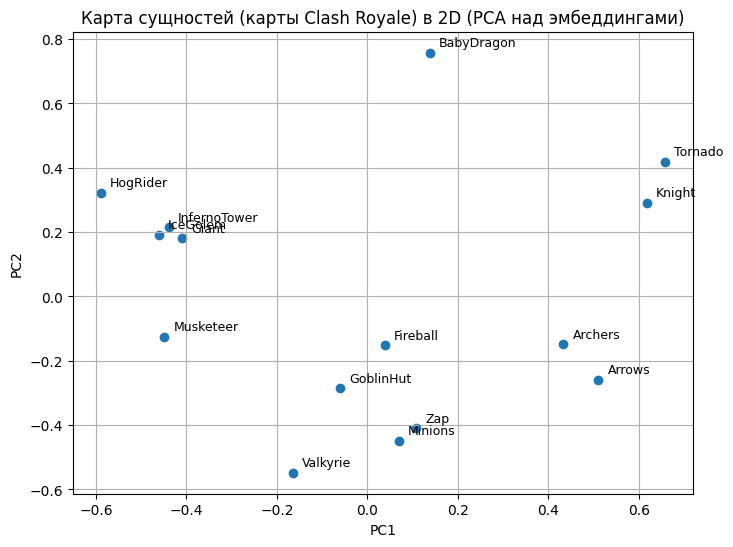

In [9]:
cards = [
    'Knight', 'Archers', 'Fireball', 'Giant', 'Musketeer',
    'BabyDragon', 'GoblinHut', 'InfernoTower', 'Zap',
    'HogRider', 'IceGolem', 'Arrows', 'Minions', 'Valkyrie', 'Tornado'
]

card_indices = [tf.entity_to_id[c] for c in cards]
card_vectors = entity_embeddings[card_indices]

pca = PCA(n_components=2)
card_vectors_2d = pca.fit_transform(card_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(card_vectors_2d[:, 0], card_vectors_2d[:, 1])

for i, card in enumerate(cards):
    x, y = card_vectors_2d[i]
    plt.text(x + 0.02, y + 0.02, card, fontsize=9)

plt.title("Карта сущностей (карты Clash Royale) в 2D (PCA над эмбеддингами)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [18]:
import numpy as np
import torch

troops_and_buildings = [
    'Knight', 'Archers', 'Fireball', 'Giant', 'Musketeer',
    'BabyDragon', 'GoblinHut', 'InfernoTower', 'Zap',
    'HogRider', 'IceGolem', 'Arrows', 'Minions', 'Valkyrie', 'Tornado'
]

def rank_tails(head, relation, candidates=None, k=10):
    """Ранжирование кандидатов t в триплете (head, relation, t)."""
    if head not in tf.entity_to_id:
        print(f"Нет такой сущности (head): {head}")
        return
    if relation not in tf.relation_to_id:
        print(f"Нет такого отношения: {relation}")
        return

    h_id = tf.entity_to_id[head]
    r_id = tf.relation_to_id[relation]

    if candidates is None:
        tails = list(tf.entity_to_id.keys())
    else:
        tails = candidates

    # проверим кандидатов
    for t in tails:
        if t not in tf.entity_to_id:
            print(f"Кандидат '{t}' не найден в entity_to_id")
            return

    t_ids = torch.tensor([tf.entity_to_id[t] for t in tails], dtype=torch.long)
    h_ids = torch.full_like(t_ids, h_id)
    r_ids = torch.full_like(t_ids, r_id)

    batch_hrt = torch.stack([h_ids, r_ids, t_ids], dim=1)

    with torch.no_grad():
        scores_torch = model.score_hrt(batch_hrt)
        scores = scores_torch.view(-1).cpu().numpy()

    order = np.argsort(scores)[::-1]

    print(f"Ранжирование кандидатов для ({head}, {relation}, ?):")
    for idx in order[:k]:
        idx = int(idx)
        print(f"  {tails[idx]:15s}  score={scores[idx]:.4f}")


def rank_heads(relation, tail, candidates=None, k=10):
    """Ранжирование кандидатов h в триплете (h, relation, tail)."""
    if tail not in tf.entity_to_id:
        print(f"Нет такой сущности (tail): {tail}")
        return
    if relation not in tf.relation_to_id:
        print(f"Нет такого отношения: {relation}")
        return

    r_id = tf.relation_to_id[relation]
    t_id = tf.entity_to_id[tail]

    if candidates is None:
        heads = list(tf.entity_to_id.keys())
    else:
        heads = candidates

    for h in heads:
        if h not in tf.entity_to_id:
            print(f"Кандидат '{h}' не найден в entity_to_id")
            return

    h_ids = torch.tensor([tf.entity_to_id[h] for h in heads], dtype=torch.long)
    r_ids = torch.full_like(h_ids, r_id)
    t_ids = torch.full_like(h_ids, t_id)

    batch_hrt = torch.stack([h_ids, r_ids, t_ids], dim=1)

    with torch.no_grad():
        scores_torch = model.score_hrt(batch_hrt)
        scores = scores_torch.view(-1).cpu().numpy()

    order = np.argsort(scores)[::-1]

    print(f"Ранжирование кандидатов для (?, {relation}, {tail}):")
    for idx in order[:2]:
        idx = int(idx)
        print(f"  {heads[idx]:15s}  score={scores[idx]:.4f}")

print("Кого контрит InfernoTower?")
rank_tails('InfernoTower', 'counters', candidates=troops_and_buildings, k=5)

print("\nКто контрит HogRider?")
rank_heads('counters', 'HogRider', candidates=troops_and_buildings, k=5)


Кого контрит InfernoTower?
Ранжирование кандидатов для (InfernoTower, counters, ?):
  HogRider         score=-5.2839
  BabyDragon       score=-5.3968
  Giant            score=-5.6413
  IceGolem         score=-6.9790
  Minions          score=-7.0706

Кто контрит HogRider?
Ранжирование кандидатов для (?, counters, HogRider):
  InfernoTower     score=-5.2839
  Valkyrie         score=-7.1410


In [14]:
import numpy as np
import torch

cards_for_deck = [
    'Knight', 'Archers', 'Fireball', 'Giant', 'Musketeer',
    'BabyDragon', 'GoblinHut', 'InfernoTower', 'Zap',
    'HogRider', 'IceGolem', 'Arrows', 'Minions', 'Valkyrie', 'Tornado'
]

def recommend_companions(card, candidates=None, top_k=3):
    """Показать top_k карт, которые лучше всего синергируют с выбранной."""
    relation = 'synergizesWith'

    if card not in tf.entity_to_id:
        print(f"Нет такой карты: {card}")
        return
    if relation not in tf.relation_to_id:
        print("Отношение 'synergizesWith' не найдено в графе.")
        return

    if candidates is None:
        candidates = cards_for_deck

    candidates = [c for c in candidates if c != card]

    h_id = tf.entity_to_id[card]
    r_id = tf.relation_to_id[relation]

    for c in candidates:
        if c not in tf.entity_to_id:
            print(f"Кандидат '{c}' не найден в entity_to_id")
            return

    t_ids = torch.tensor([tf.entity_to_id[c] for c in candidates], dtype=torch.long)
    h_ids = torch.full_like(t_ids, h_id)
    r_ids = torch.full_like(t_ids, r_id)

    batch_hrt = torch.stack([h_ids, r_ids, t_ids], dim=1)

    with torch.no_grad():
        scores_torch = model.score_hrt(batch_hrt)
        scores = scores_torch.view(-1).cpu().numpy()

    order = np.argsort(scores)[::-1]

    print(f"Лучшие синергии для карты '{card}':")
    for idx in order[:top_k]:
        idx = int(idx)
        print(f"  {candidates[idx]:15s}  score={scores[idx]:.4f}")


recommend_companions('HogRider', candidates=cards_for_deck, top_k=3)


Лучшие синергии для карты 'HogRider':
  IceGolem         score=-7.4239
  Musketeer        score=-8.4729
  Valkyrie         score=-8.7154
